# Week 4

This week we are going to look at a concatenated version of a [dataset](https://datadryad.org/stash/dataset/doi:10.5061/dryad.2h4j5). Let's look at this dataset, after we load up our Libraries

In [1]:
import pandas

#We'll draw a graph later on
import matplotlib.pyplot as plt

#Our 'Machine Learning pieces'
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn import tree

In [2]:
citation_data = pandas.read_csv("week_4_citation_homework.csv")

Our data is 834 lines from the original dataset that represents the top X journals. The columns are:

- Score1
- Score2
- IF2
- IF5
- TopCitation - If the citation is among the top 10% this is marked 1, if not 

We are going to build a model to predict how many citations a paper will get based on characteristics

In [3]:
citation_data.head()

,Journal,Score1,Score2,IF2,IF5,TopCitation
0,Journal of the American Chemical Society,6,6.0,9.023,8.981,0
1,Science,8,10.0,31.377,31.777,1
2,Gastroenterology,6,8.0,12.032,12.403,0
3,Neuron,8,8.0,14.027,14.927,0
4,The Journal of Cell Biology,6,6.0,9.921,10.123,0


In [4]:
citation_features = ["Score1","Score2","IF2","IF5"]
citation_target = citation_data.TopCitation

X = citation_data[citation_features]
y = citation_target

In [5]:
#We'll start with 30 just for fun
test_percent = 20

X_train, X_test, y_train, y_test = train_test_split(X, \
                                                    y, \
                                                    test_size=test_percent/100.0,
                                                   random_state=10)
# Create Decision Tree classifer object
treeClass = DecisionTreeClassifier()

# Train
treeClass = treeClass.fit(X_train,y_train)

#Predict
y_pred = treeClass.predict(X_test)

#Accuracy?
metrics.accuracy_score(y_test,y_pred)

0.8834586466165414

In [6]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       240
           1       0.00      0.00      0.00        26

    accuracy                           0.88       266
   macro avg       0.45      0.49      0.47       266
weighted avg       0.81      0.88      0.85       266



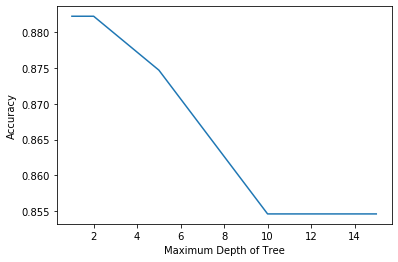

In [8]:
test_percent = 30
max_options = [1,2,5,10,15]

accuracy = []
tree_max = []

for max_d in max_options:
    X_train, X_test, y_train, y_test = train_test_split(X, \
                                                        y, \
                                                        test_size=test_percent/100.0,
                                                        random_state=10,
                                                       )
    
    #We set maximum depth in the DecisionTreeClassifer when we first create the variable
    treeClassTest = DecisionTreeClassifier(max_depth=max_d)
    treeClassTest = treeClassTest.fit(X_train,y_train)
    y_pred = treeClassTest.predict(X_test)
    score = metrics.accuracy_score(y_test,y_pred)
    accuracy.append(score)
    tree_max.append(max_d)

    
plt.plot(max_options,accuracy)
plt.ylabel("Accuracy")
plt.xlabel("Maximum Depth of Tree")
plt.show()

In [10]:
from sklearn.ensemble import RandomForestClassifier




test_percent = 20

X_train, X_test, y_train, y_test = train_test_split(X, \
                                                    y, \
                                                    test_size=test_percent/100.0,
                                                   random_state=10)

#Create Random Classifier
clf = RandomForestClassifier(n_estimators=5, random_state=0)

#Train
clf.fit(X_train,y_train)

#Predict
y_pred = clf.predict(X_train)

#Accuracy
metrics.accuracy_score(y_train,y_pred)

0.9067796610169492